# This script processes the file All_Optimizations.csv  

1. Run process_sycl_cuda_results.ipynb to get the file All_OptimizationsSYCL-CUDA.csv:

2. Run the next cells in this notebook...

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd

df=pd.read_csv('All_Optimizations.csv',sep=';')
df=df.drop(df.index[4:28])
df.reset_index(drop=True, inplace=True)
df.insert(4,"Total",0)
df['Total']=df['TimeTree']+df['TimeOWM']
dfs=pd.read_csv('All_OptimizationsSYCL-CUDA.csv',sep=';')
dfs.insert(4,"Total",0)
dfs['Total']=dfs['TimeTree']+dfs['TimeOWM']
print(df)
dfs

  Optimization   Cloud  TimeTree   TimeOWM      Total  Level  MinRadMaxNum
0     Baseline   Alcoy  4.737780  3.733700   8.471480      0           0.0
1     Baseline   Arzua  5.749600  4.105800   9.855400      0           0.0
2     Baseline  BrionF  5.971560  6.233900  12.205460      0           0.0
3     Baseline  BrionU  6.761090  7.327300  14.088390      0           0.0
4  Opt4-MinRad   Alcoy  0.167986  0.275714   0.443700      5           1.8
5  Opt4-MinRad   Arzua  0.329102  0.270224   0.599326      5           0.5
6  Opt4-MinRad  BrionF  0.766410  0.276490   1.042900      4           0.1
7  Opt4-MinRad  BrionU  0.866690  0.336850   1.203540      4           0.1


,Optimization,Cloud,TimeTree,TimeOWM,Total,Level,MinRadMaxNum
0,owm-sycl-cpu,Alcoy,0.39190,0.19109,0.58299,0,64
1,owm-sycl-cpu,Arzua,0.81469,0.19765,1.01234,0,128
2,owm-sycl-cpu,BrionF,0.97617,0.11153,1.08770,0,128
3,owm-sycl-cpu,BrionU,1.10405,0.12631,1.23036,0,128
4,owm-sycl-cpu-nomemo,Alcoy,0.39146,0.22724,0.61870,0,64
5,owm-sycl-cpu-nomemo,Arzua,0.81833,0.26675,1.08508,0,128
6,owm-sycl-cpu-nomemo,BrionF,0.96195,0.20382,1.16577,0,512
7,owm-sycl-cpu-nomemo,BrionU,1.09199,0.23396,1.32595,0,512
8,owm-sycl-dgpu,Alcoy,0.29006,0.22956,0.51962,0,64
9,owm-sycl-dgpu,Arzua,0.35557,0.32924,0.68481,0,128


In [73]:
base=df.loc[0:3,'TimeTree':'Total']
best=dfs.loc[24:27,'TimeTree':'Total']
b=np.array(base)
c=np.array(best)
speedup=b/c
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}x".format(x)})
#Print total speedup for each cloud (one cloud per row, one column for ech time measurement)
print("Speedup of cuda over OMP baseline:")
print(speedup)

Speedup of cuda over OMP baseline:
[[201.78x 32.93x 61.90x]
 [133.22x 28.37x 52.46x]
 [100.03x 63.73x 77.49x]
 [98.04x 68.89x 80.36x]]


In [74]:
base=df.loc[4:7,'TimeTree':'Total']
best=dfs.loc[24:27,'TimeTree':'Total']
b=np.array(base)
c=np.array(best)
speedup=b/c
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}x".format(x)})
#Print total speedup for each cloud (one cloud per row, one column for ech time measurement)
print("Speedup of cuda over optim 4 TBB best execution:")
print(speedup)

Speedup of cuda over optim 4 TBB best execution:
[[7.15x 2.43x 3.24x]
 [7.63x 1.87x 3.19x]
 [12.84x 2.83x 6.62x]
 [12.57x 3.17x 6.86x]]


# Speedup of each optimization w.r.t. the previous one

In [75]:
pd.options.mode.chained_assignment = None  # default='warn'
dfs=pd.read_csv('All_OptimizationsSYCL-CUDA.csv',sep=';')
dfs.insert(4,"Total",0)
dfs['Total']=dfs['TimeTree']+dfs['TimeOWM']
dfm=dfs[~dfs["Optimization"].str.contains("nomemo")]
dfm
dfm['TreeSp']=1
dfm['OWMSp']=1
dfm['TotalSp']=1
dfm.reset_index(drop=True, inplace=True)
#Speedup of one optimization w.r.t. the previous one
for i in range(4,len(dfm)):
    dfm.loc[i,'TreeSp']=dfm['TimeTree'][i-4]/dfm['TimeTree'][i]
    dfm.loc[i,'OWMSp']=dfm['TimeOWM'][i-4]/dfm['TimeOWM'][i]
    dfm.loc[i,'TotalSp']=dfm['Total'][i-4]/dfm['Total'][i]
dfm

,Optimization,Cloud,TimeTree,TimeOWM,Total,Level,MinRadMaxNum,TreeSp,OWMSp,TotalSp
0,owm-sycl-cpu,Alcoy,0.39190,0.19109,0.58299,0,64,1.000000,1.000000,1.000000
1,owm-sycl-cpu,Arzua,0.81469,0.19765,1.01234,0,128,1.000000,1.000000,1.000000
2,owm-sycl-cpu,BrionF,0.97617,0.11153,1.08770,0,128,1.000000,1.000000,1.000000
3,owm-sycl-cpu,BrionU,1.10405,0.12631,1.23036,0,128,1.000000,1.000000,1.000000
4,owm-sycl-dgpu,Alcoy,0.29006,0.22956,0.51962,0,64,1.351100,0.832419,1.121955
5,owm-sycl-dgpu,Arzua,0.35557,0.32924,0.68481,0,128,2.291223,0.600322,1.478279
6,owm-sycl-dgpu,BrionF,0.93017,0.16180,1.09197,0,64,1.049453,0.689308,0.996090
7,owm-sycl-dgpu,BrionU,0.67697,0.16601,0.84298,0,32,1.630870,0.760858,1.459536
8,owm-sycl-cuda-dgpu,Alcoy,0.02955,0.17032,0.19987,0,64,9.815905,1.347816,2.599790
9,owm-sycl-cuda-dgpu,Arzua,0.05855,0.21247,0.27102,0,128,6.072929,1.549583,2.526788


# Speedup of each optimization w.r.t. SYCL-CPU

In [76]:
dfs=pd.read_csv('All_OptimizationsSYCL-CUDA.csv',sep=';')
dfs.insert(4,"Total",0)
dfs['Total']=dfs['TimeTree']+dfs['TimeOWM']
dfm=dfs[~dfs["Optimization"].str.contains("nomemo")]
dfm
dfm['TreeSp']=1
dfm['OWMSp']=1
dfm['TotalSp']=1
dfm.reset_index(drop=True, inplace=True)
#Speedup of one optimization w.r.t. owm-sycl-cpu
for i in range(4,len(dfm),4):
    for j in range(4):
        dfm.loc[i+j,'TreeSp']=dfm['TimeTree'][j]/dfm['TimeTree'][i+j]
        dfm.loc[i+j,'OWMSp']=dfm['TimeOWM'][j]/dfm['TimeOWM'][i+j]
        dfm.loc[i+j,'TotalSp']=dfm['Total'][j]/dfm['Total'][i+j]
dfm


,Optimization,Cloud,TimeTree,TimeOWM,Total,Level,MinRadMaxNum,TreeSp,OWMSp,TotalSp
0,owm-sycl-cpu,Alcoy,0.39190,0.19109,0.58299,0,64,1.000000,1.000000,1.000000
1,owm-sycl-cpu,Arzua,0.81469,0.19765,1.01234,0,128,1.000000,1.000000,1.000000
2,owm-sycl-cpu,BrionF,0.97617,0.11153,1.08770,0,128,1.000000,1.000000,1.000000
3,owm-sycl-cpu,BrionU,1.10405,0.12631,1.23036,0,128,1.000000,1.000000,1.000000
4,owm-sycl-dgpu,Alcoy,0.29006,0.22956,0.51962,0,64,1.351100,0.832419,1.121955
5,owm-sycl-dgpu,Arzua,0.35557,0.32924,0.68481,0,128,2.291223,0.600322,1.478279
6,owm-sycl-dgpu,BrionF,0.93017,0.16180,1.09197,0,64,1.049453,0.689308,0.996090
7,owm-sycl-dgpu,BrionU,0.67697,0.16601,0.84298,0,32,1.630870,0.760858,1.459536
8,owm-sycl-cuda-dgpu,Alcoy,0.02955,0.17032,0.19987,0,64,13.262267,1.121947,2.916846
9,owm-sycl-cuda-dgpu,Arzua,0.05855,0.21247,0.27102,0,128,13.914432,0.930249,3.735296


# Speedup of each optimization w.r.t. Baseline OpenMP

In [77]:
df=pd.read_csv('All_Optimizations.csv',sep=';')
df=df.drop(df.index[4:28])
df.reset_index(drop=True, inplace=True)
df.insert(4,"Total",0)
df['Total']=df['TimeTree']+df['TimeOWM']
dfs=pd.read_csv('All_OptimizationsSYCL-CUDA.csv',sep=';')
dfs.insert(4,"Total",0)
dfs['Total']=dfs['TimeTree']+dfs['TimeOWM']
dfm=dfs[~dfs["Optimization"].str.contains("nomemo")]
dfm['TreeSp']=1
dfm['OWMSp']=1
dfm['TotalSp']=1
dfm.reset_index(drop=True, inplace=True)
#Speedup of one optimization w.r.t. owm-sycl-cpu
for i in range(0,len(dfm),4):
    for j in range(4):
        dfm.loc[i+j,'TreeSp']=df['TimeTree'][j]/dfm['TimeTree'][i+j]
        dfm.loc[i+j,'OWMSp']=df['TimeOWM'][j]/dfm['TimeOWM'][i+j]
        dfm.loc[i+j,'TotalSp']=df['Total'][j]/dfm['Total'][i+j]
dfm

,Optimization,Cloud,TimeTree,TimeOWM,Total,Level,MinRadMaxNum,TreeSp,OWMSp,TotalSp
0,owm-sycl-cpu,Alcoy,0.39190,0.19109,0.58299,0,64,12.089257,19.538961,14.531090
1,owm-sycl-cpu,Arzua,0.81469,0.19765,1.01234,0,128,7.057408,20.773084,9.735267
2,owm-sycl-cpu,BrionF,0.97617,0.11153,1.08770,0,128,6.117336,55.894378,11.221348
3,owm-sycl-cpu,BrionU,1.10405,0.12631,1.23036,0,128,6.123898,58.010450,11.450624
4,owm-sycl-dgpu,Alcoy,0.29006,0.22956,0.51962,0,64,16.333793,16.264593,16.303222
5,owm-sycl-dgpu,Arzua,0.35557,0.32924,0.68481,0,128,16.170093,12.470538,14.391437
6,owm-sycl-dgpu,BrionF,0.93017,0.16180,1.09197,0,64,6.419859,38.528430,11.177468
7,owm-sycl-dgpu,BrionU,0.67697,0.16601,0.84298,0,32,9.987282,44.137703,16.712603
8,owm-sycl-cuda-dgpu,Alcoy,0.02955,0.17032,0.19987,0,64,160.330964,21.921677,42.384950
9,owm-sycl-cuda-dgpu,Arzua,0.05855,0.21247,0.27102,0,128,98.199829,19.324140,36.364106


In [78]:
all=np.array(dfm.loc[0:,'TreeSp':'TotalSp'])
clouds=list(dfm.loc[0:3,'Cloud'])
bycloud={}
for i,j in zip(clouds,range(len(clouds))):
    bycloud[i]=all[j::4].T
#print(bycloud)
print("\\begin{tabular}{|c|ccc|ccc|ccc|ccc|}\hline")
print(" & \multicolumn{3}{c|}{S-CPU} & \multicolumn{3}{c|}{S-dGPU} & \multicolumn{3}{c|}{S-CUDA} & \multicolumn{3}{c|}{CUDA} \\\\")  
print("Cloud & Tree & OWM & Tot & Tree & OWM & Tot & Tree & OWM & Tot & Tree & OWM & Tot \\\\ \hline")
for i in clouds:
    print(i,end='')
    for j in range(4):
        for k in range(3):
            print("& {0:0.2f}x ".format(bycloud[i][k][j]),end='')

    print("\\\\ \hline")
print("\\end{tabular}")

\begin{tabular}{|c|ccc|ccc|ccc|ccc|}\hline
 & \multicolumn{3}{c|}{S-CPU} & \multicolumn{3}{c|}{S-dGPU} & \multicolumn{3}{c|}{S-CUDA} & \multicolumn{3}{c|}{CUDA} \\
Cloud & Tree & OWM & Tot & Tree & OWM & Tot & Tree & OWM & Tot & Tree & OWM & Tot \\ \hline
Alcoy& 12.09x & 19.54x & 14.53x & 16.33x & 16.26x & 16.30x & 160.33x & 21.92x & 42.38x & 201.78x & 32.93x & 61.90x \\ \hline
Arzua& 7.06x & 20.77x & 9.74x & 16.17x & 12.47x & 14.39x & 98.20x & 19.32x & 36.36x & 133.22x & 28.37x & 52.46x \\ \hline
BrionF& 6.12x & 55.89x & 11.22x & 6.42x & 38.53x & 11.18x & 74.87x & 39.27x & 51.17x & 100.03x & 63.73x & 77.49x \\ \hline
BrionU& 6.12x & 58.01x & 11.45x & 9.99x & 44.14x & 16.71x & 75.43x & 42.85x & 54.06x & 98.04x & 68.89x & 80.36x \\ \hline
\end{tabular}


# Speedup of each optimization w.r.t. Baseline TBB CPU optim 4

In [79]:
df=pd.read_csv('All_Optimizations.csv',sep=';')
df=df.drop(df.index[4:28])
df.reset_index(drop=True, inplace=True)
df.insert(4,"Total",0)
df['Total']=df['TimeTree']+df['TimeOWM']
print(df.loc[4:7,'TimeTree':'Total'])
dfs=pd.read_csv('All_OptimizationsSYCL-CUDA.csv',sep=';')
dfs.insert(4,"Total",0)
dfs['Total']=dfs['TimeTree']+dfs['TimeOWM']
dfm=dfs[~dfs["Optimization"].str.contains("nomemo")]
dfm['TreeSp']=1
dfm['OWMSp']=1
dfm['TotalSp']=1
dfm.reset_index(drop=True, inplace=True)
#Speedup of one optimization w.r.t. owm-sycl-cpu
for i in range(0,len(dfm),4):
    for j in range(4):
        dfm.loc[i+j,'TreeSp']=df['TimeTree'][j+4]/dfm['TimeTree'][i+j]
        dfm.loc[i+j,'OWMSp']=df['TimeOWM'][j+4]/dfm['TimeOWM'][i+j]
        dfm.loc[i+j,'TotalSp']=df['Total'][j+4]/dfm['Total'][i+j]
dfm

   TimeTree   TimeOWM     Total
4  0.167986  0.275714  0.443700
5  0.329102  0.270224  0.599326
6  0.766410  0.276490  1.042900
7  0.866690  0.336850  1.203540


,Optimization,Cloud,TimeTree,TimeOWM,Total,Level,MinRadMaxNum,TreeSp,OWMSp,TotalSp
0,owm-sycl-cpu,Alcoy,0.39190,0.19109,0.58299,0,64,0.428645,1.442849,0.761077
1,owm-sycl-cpu,Arzua,0.81469,0.19765,1.01234,0,128,0.403960,1.367184,0.592020
2,owm-sycl-cpu,BrionF,0.97617,0.11153,1.08770,0,128,0.785119,2.479064,0.958812
3,owm-sycl-cpu,BrionU,1.10405,0.12631,1.23036,0,128,0.785010,2.666851,0.978202
4,owm-sycl-dgpu,Alcoy,0.29006,0.22956,0.51962,0,64,0.579142,1.201054,0.853893
5,owm-sycl-dgpu,Arzua,0.35557,0.32924,0.68481,0,128,0.925562,0.820751,0.875171
6,owm-sycl-dgpu,BrionF,0.93017,0.16180,1.09197,0,64,0.823946,1.708838,0.955063
7,owm-sycl-dgpu,BrionU,0.67697,0.16601,0.84298,0,32,1.280249,2.029095,1.427721
8,owm-sycl-cuda-dgpu,Alcoy,0.02955,0.17032,0.19987,0,64,5.684805,1.618800,2.219943
9,owm-sycl-cuda-dgpu,Arzua,0.05855,0.21247,0.27102,0,128,5.620871,1.271822,2.211372


# Improvement Factor for each cloud

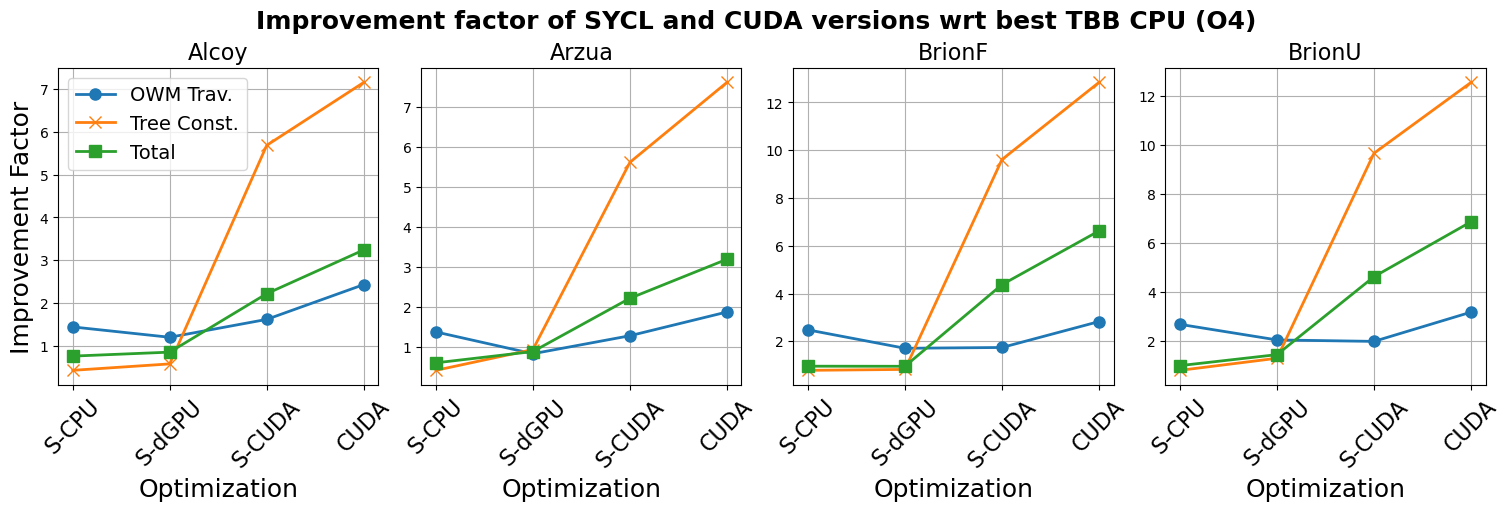

In [80]:
def plot_allsp(df,xlab):
    #Configuration variables
    titlefs = 20
    ylabelfs = 18
    xlabelfs = 18
    xticksfs = 16
    yticksfs = 16
    legendfs = 14
    linew = 2
    markers = 8
    marks=['o-','x-','s-','v-','+-']

    all=np.array(df.loc[0:,'TreeSp':'TotalSp'])
    clouds=list(df.loc[0:3,'Cloud'])
    bycloud={}
    for i,j in zip(clouds,range(len(clouds))):
        bycloud[i]=all[j::4].T

    #fig = plt.figure()
    labels=['OWM Trav.','Tree Const.','Total']
    x=np.arange(1,len(xlab)+1)
    #define grid of plots
    fig, axs = plt.subplots(nrows=1, ncols=4,figsize=(15, 5), constrained_layout=True)#, sharey=True)
    for i,name in zip(range(len(clouds)),clouds):
        axs[i].plot(x, bycloud[name][1], marks[0], linewidth=linew, markersize=markers)
        axs[i].plot(x, bycloud[name][0], marks[1], linewidth=linew, markersize=markers)
        axs[i].plot(x, bycloud[name][2], marks[2], linewidth=linew, markersize=markers)

        axs[i].set_title(name,fontsize=16)
        axs[i].set_xlabel('Optimization', fontsize=xlabelfs)
        axs[i].set_xticks(x,labels=xlab,fontsize=xticksfs,rotation = 45)
        # axs[i].yticks(fontsize=yticksfs)
        axs[i].grid()
    fig.suptitle('Improvement factor of SYCL and CUDA versions wrt best TBB CPU (O4)',  fontweight='bold', fontsize=18)
    
    axs[0].set_ylabel('Improvement Factor', fontsize=ylabelfs)
    axs[0].legend(labels,loc='best', fontsize= 14)
    pp = PdfPages("Speedup_all_CUDA.pdf")
    pp.savefig(fig)
    pp.close()
    #axs[i].show()


plot_allsp(dfm,['S-CPU','S-dGPU','S-CUDA','CUDA'])

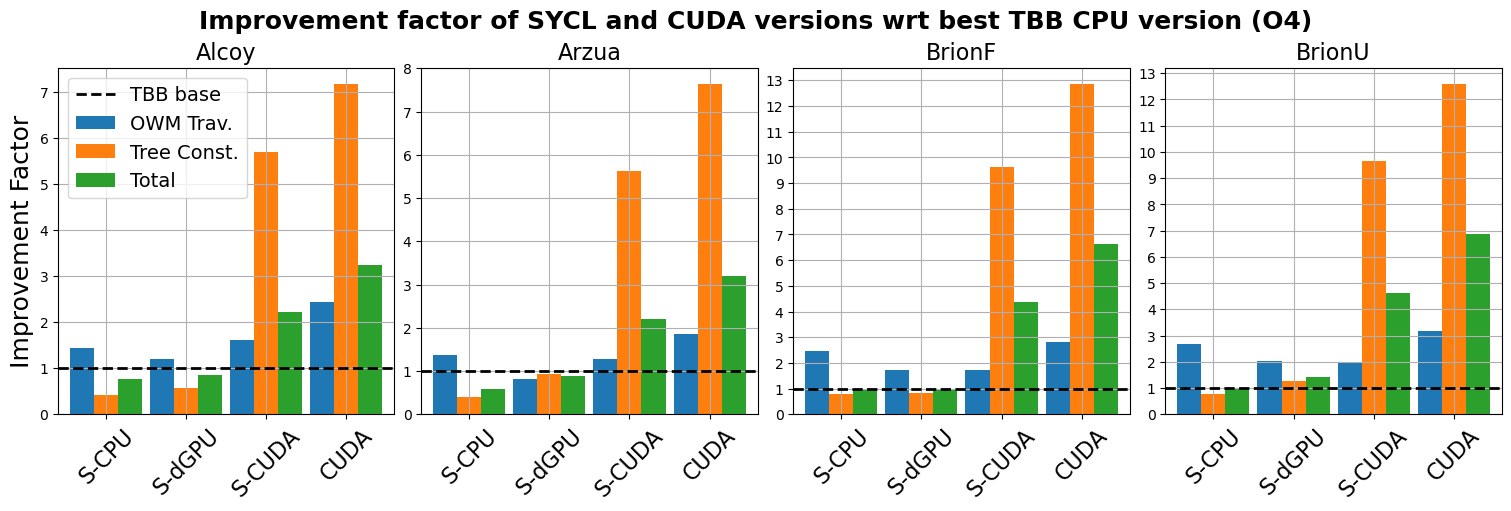

In [81]:
def plot_allspbar(df,xlab):
    #Configuration variables
    titlefs = 20
    ylabelfs = 18
    xlabelfs = 18
    xticksfs = 16
    yticksfs = 16
    legendfs = 14
    linew = 2
    markers = 8
    marks=['o-','x-','s-','v-','+-']

    all=np.array(df.loc[0:,'TreeSp':'TotalSp'])
    clouds=list(df.loc[0:3,'Cloud'])
    bycloud={}
    for i,j in zip(clouds,range(len(clouds))):
        bycloud[i]=all[j::4].T

    #fig = plt.figure()
    labels=['TBB base','OWM Trav.','Tree Const.','Total']
    x=np.arange(1,len(xlab)+1)
    width=0.3
    xx=np.arange(1-2*width,len(xlab)+1+2*width)
    #define grid of plots
    fig, axs = plt.subplots(nrows=1, ncols=4,figsize=(15, 5), constrained_layout=True)#, sharey=True)
    for i,name in zip(range(len(clouds)),clouds):
        axs[i].bar(x-width, bycloud[name][1],width)
        axs[i].bar(x, bycloud[name][0],width)
        axs[i].bar(x+width, bycloud[name][2],width)
        axs[i].plot(xx,np.ones(len(xx)), 'k--', linewidth=linew, markersize=markers)
        axs[i].set_title(name,fontsize=16)
        #axs[i].set_xlabel('Version', fontsize=xlabelfs)
        axs[i].set_xlim(1-2*width,len(xlab)+2*width)
        axs[i].set_xticks(x,labels=xlab,fontsize=xticksfs,rotation = 45)
        start, end = axs[i].get_ylim()
        axs[i].yaxis.set_ticks(np.arange(start, end, 1))
        # axs[i].yticks(fontsize=yticksfs)
        axs[i].grid()
    fig.suptitle('Improvement factor of SYCL and CUDA versions wrt best TBB CPU version (O4)',  fontweight='bold', fontsize=18)
    
    axs[0].set_ylabel('Improvement Factor', fontsize=ylabelfs)
    axs[0].legend(labels,loc='best', fontsize= 14)
    pp = PdfPages("Speedup_all_CUDA.pdf")
    pp.savefig(fig)
    pp.close()
    #axs[i].show()


plot_allspbar(dfm,['S-CPU','S-dGPU','S-CUDA','CUDA'])
   

# Compute million of points processed per second

In [82]:
NumberOfPoints=[20380212,40706503,42384876,48024480]
print('Throughput of best TBB CPU version (O4):')
for i in range(4):
    print('Cloud:{}; Number of points: {:,}, Throughput: {:.3e}'.format(df['Cloud'][i+4], NumberOfPoints[i],NumberOfPoints[i]/df['Total'][i+4]))

print('Throughput of best GPU version (CUDA):')
for i in range(4):
    print('Cloud:{}; Number of points: {:,}, Throughput: {:.3e}'.format(dfm['Cloud'][i+12], NumberOfPoints[i],NumberOfPoints[i]/dfm['Total'][i+12]))
dfm[:][12:16]

Throughput of best TBB CPU version (O4):
Cloud:Alcoy; Number of points: 20,380,212, Throughput: 4.593e+07
Cloud:Arzua; Number of points: 40,706,503, Throughput: 6.792e+07
Cloud:BrionF; Number of points: 42,384,876, Throughput: 4.064e+07
Cloud:BrionU; Number of points: 48,024,480, Throughput: 3.990e+07
Throughput of best GPU version (CUDA):
Cloud:Alcoy; Number of points: 20,380,212, Throughput: 1.489e+08
Cloud:Arzua; Number of points: 40,706,503, Throughput: 2.167e+08
Cloud:BrionF; Number of points: 42,384,876, Throughput: 2.691e+08
Cloud:BrionU; Number of points: 48,024,480, Throughput: 2.739e+08


,Optimization,Cloud,TimeTree,TimeOWM,Total,Level,MinRadMaxNum,TreeSp,OWMSp,TotalSp
12,owm-cuda,Alcoy,0.02348,0.11338,0.13686,0,16,7.154429,2.431769,3.241999
13,owm-cuda,Arzua,0.04316,0.14472,0.18788,0,32,7.625162,1.867219,3.189940
14,owm-cuda,BrionF,0.05970,0.09781,0.15751,0,64,12.837688,2.826807,6.621167
15,owm-cuda,BrionU,0.06896,0.10636,0.17532,0,64,12.568010,3.167074,6.864819
